# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

# Checando se toda linha termina com ';'

In [2]:

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    
    for line_number,line in enumerate(csv_file):
        pos = line.find(';')
        if  pos != len(line)-2:
            print(line_number, pos)
            print(line)
            
            

134633 47
13,Downstairs,3498732310000,5.13,10.42,4.671779;15,Jogging,328982249000,5.37,-3.36,7.3141265;

197686 47
27,Jogging,10814072309000,4.21,-0.65,-0.6537767;27,Jogging,0,0,0,0.0;

273260 20
18,Jogging,0,0,0,0.0;18,Jogging,0,0,0,0.0;

343419 -1
11,Walking,1867172313000,4.4,4.4,

371931 48
16,Downstairs,7160742320000,4.79,7.31,-4.0588636;5,Walking,1202262279000,-1.23,3.45,-0.38136974;

711483 40
30,Standing,1729732341000,-1.8,9.28,3.79;34,Walking,295812327000,0.8,18.96,13.57;



A linha 343419 (0 indexado) está faltando um valor, substituirei pela média quando transformar em dataframe, por hora colocarei o valor 1.23456789 para poder baixar o csv se problemas.

Os outros serão tratados posteriormente

In [3]:

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    
    for line_number,line in enumerate(csv_file):
        if len(line) > 1:
            
            if  (pos:= line.find(';')) == -1:
                print(pos)
                print(line[:-1] + '1.23456789;'+ line[-1])
            
            

-1
11,Walking,1867172313000,4.4,4.4,1.23456789;



## Checando o numero de features no csv (que é um txt)

In [4]:
# verificar regularidade do numero de features (virgulas)

# informa quais linhas existem com cada quantidade de features 
# sera um dict de lists, as keys serao o numero de features  
# e os values serao as listas com os numeros das linhas
lines_feats = dict()

# linhas com mais de 6 features
lines_problems = []

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    
    for line_number,line in enumerate(csv_file):
        line_divided = line.split(',')
        n_feats = len(line_divided)
        
        # se ja ouver pelo menos uma linha com esta quantidade de features, 
        # adicione esta linha
        if n_feats in lines_feats:
            lines_feats[n_feats].append(line_number)
        # se nao tivermos nenhuma linha com esta quantidade de features,
        # registramos que encontramos uma linha assim
        else:
            lines_feats[n_feats] = [line_number]

for k,v in lines_feats.items():
    print(f"n° features:{k}, n° lines: {len(v)}")

n° features:6, n° lines: 1086466
n° features:11, n° lines: 5
n° features:1, n° lines: 6
n° features:7, n° lines: 11733


### linhas com 7 features (6 vírgulas na verdade)

In [5]:
with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    i = 0
    lines_feats[7].sort()
    for line_number,line in enumerate(csv_file):
        
        # ja vimos todos
        if i == len(lines_feats[7]):
            break
        
        if line_number == lines_feats[7][i]:
            i += 1
            # elimino a última virgula
            line = line[:-3] + line[-1:]
            n_feats = len(line.split(','))
            if n_feats != 6:
                print(line)

como nenhuma linha foi impressa, significa que todos os erros foram removidos retirando-se a ultima virgula, que fica exatamente antes  do ';'

### linhas com 11 features

In [6]:

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    i = 0
    lines_feats[11].sort()
    for line_number,line in enumerate(csv_file):
        
        # ja vimos todos
        if i == len(lines_feats[11]):
            break
        
        if line_number == lines_feats[11][i]:
            i += 1
            print(line.replace(';',';\n', 1))



13,Downstairs,3498732310000,5.13,10.42,4.671779;
15,Jogging,328982249000,5.37,-3.36,7.3141265;

27,Jogging,10814072309000,4.21,-0.65,-0.6537767;
27,Jogging,0,0,0,0.0;

18,Jogging,0,0,0,0.0;
18,Jogging,0,0,0,0.0;

16,Downstairs,7160742320000,4.79,7.31,-4.0588636;
5,Walking,1202262279000,-1.23,3.45,-0.38136974;

30,Standing,1729732341000,-1.8,9.28,3.79;
34,Walking,295812327000,0.8,18.96,13.57;



Evidentemente, basta colocar '\n' após o ';' ao meio (o primeiro ';' que aparecer)

In [7]:

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    i = 0
    
    for line_number,line in enumerate(csv_file):
        
        # ja vimos todos
        if i == len(lines_feats[11]):
            break
        
        if line_number == lines_feats[11][i]:
            i += 1
            



### linhas com 1 feature (0 vígulas)

In [8]:

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    i = 0
    lines_feats[1].sort()
    for line_number,line in enumerate(csv_file):
        
        # ja vimos todos
        if i == len(lines_feats[1]):
            break
        
        if line_number == lines_feats[1][i]:
            i += 1
            print(line)



são linhas vazias, basta apagá-las

# Fazendo as correções:

In [9]:
with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    with open("D:\Machine Learning\desafio-valorian\\temp_file.txt", "w") as temp_file:
        
        i7, i11, i1  = 0,0,0
        for line_number,line in enumerate(csv_file):
            
            # ainda nao resolvemos todos os de 1 feature
            if i1 < len(lines_feats[1]) and  line_number == lines_feats[1][i1]:
                i1+=1
                continue

            # ainda nao resolvemos todos os de 7 features
            elif i7 < len(lines_feats[7]) and line_number == lines_feats[7][i7]:
                    i7 += 1
                    # elimino a última virgula
                    line = line[:-3] + line[-1:]
                    temp_file.write(line)
                    
            elif i11 < len(lines_feats[11]) and line_number == lines_feats[11][i11]:
                i11 += 1
                temp_file.write(line.replace(';',';\n', 1))
            
            elif (pos := line.find(';')) != len(line)-2:       
                if pos == -1:     
                    temp_file.write(line[:-1] + '1.23456789;'+ line[-1])
                        
            else:        
                temp_file.write(line)
                            

In [10]:
with open("D:\Machine Learning\desafio-valorian\\temp_file.txt", "r") as temp_file:
    lines = len(temp_file.readlines())
    print('Total Number of lines in treated file:', lines)

with open("D:\Machine Learning\desafio-valorian\dataset\coleta.txt", "r") as csv_file:
    lines = len(csv_file.readlines())
    print('Total Number of lines in original file:', lines)

Total Number of lines in treated file: 1098209
Total Number of lines in original file: 1098210


In [11]:
with open("D:\Machine Learning\desafio-valorian\\temp_file.txt", "r") as temp_file:
    with open("D:\Machine Learning\desafio-valorian\dataset\coleta_tratada.txt", "w") as tratada:
        for line in temp_file:
            tratada.write(line[:-2]+line[-1])

os.remove("D:\Machine Learning\desafio-valorian\\temp_file.txt")    

## Teste

In [12]:
# verificar regularidade do numero de features (virgulas)

# informa quais linhas existem com cada quantidade de features 
# sera um dict de lists, as keys serao o numero de features  
# e os values serao as listas com os numeros das linhas
lines_feats = dict()

with open("D:\Machine Learning\desafio-valorian\dataset\coleta_tratada.txt", "r") as tratada:
    
    for line_number,line in enumerate(tratada):
        line_divided = line.split(',')
        n_feats = len(line_divided)
        
        # se ja ouver pelo menos uma linha com esta quantidade de features, 
        # adicione esta linha
        if n_feats in lines_feats:
            lines_feats[n_feats].append(line_number)
        # se nao tivermos nenhuma linha com esta quantidade de features,
        # registramos que encontramos uma linha assim
        else:
            lines_feats[n_feats] = [line_number]

for k,v in lines_feats.items():
    print(f"n° features:{k}, n° lines: {len(v)}")

n° features:6, n° lines: 1098209


Todas linhas estão com o mesmo número de features

In [15]:
colunas = ["Individuo", "Atividade","Timestamp","ax","ay","az"]
df = pd.read_csv("D:\Machine Learning\desafio-valorian\dataset\coleta_tratada.txt",names = colunas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098209 entries, 0 to 1098208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Individuo  1098209 non-null  int64  
 1   Atividade  1098209 non-null  object 
 2   Timestamp  1098209 non-null  int64  
 3   ax         1098209 non-null  float64
 4   ay         1098209 non-null  float64
 5   az         1098158 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 50.3+ MB


In [16]:
df.describe()

,Individuo,Timestamp,ax,ay,az
count,1.098209e+06,1.098209e+06,1.098209e+06,1.098209e+06,1.098158e+06
mean,1.886067e+01,3.340892e+13,6.628694e-01,7.255624e+00,4.105925e-01
std,1.021423e+01,4.944961e+13,6.849044e+00,6.746214e+00,4.753521e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,2.019102e+12,-2.870000e+00,3.170000e+00,-2.220000e+00
50%,1.900000e+01,9.722652e+12,2.700000e-01,7.930000e+00,0.000000e+00
75%,2.800000e+01,4.996557e+13,4.440000e+00,1.156000e+01,2.720000e+00
max,3.600000e+01,2.093974e+14,1.995000e+01,2.004000e+01,1.961000e+01


Como dito no começo, para evitar possíveis variações brucas das acelarações ao remover um dado, devemos corrigir o dado:
11,Walking,1867172313000,4.4,4.4

Colocaremos o dado faltante como a média do az imediatamente e antes e depois, tentando manter o tanto quanto possível a continuidade

In [80]:
indice = df[df["Individuo"] == 11][df["Atividade"] == "Walking"][df["Timestamp"] == 1867172313000].index[0]

antes  = df.iloc[indice-1]
depois = df.iloc[indice+1]

df.iloc[indice]["az"] = (antes["az"] + depois["az"])/2

C:\Users\rodri\AppData\Local\Temp\ipykernel_92088\3153187853.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  indice = df[df["Individuo"] == 11][df["Atividade"] == "Walking"][df["Timestamp"] == 1867172313000].index[0]
c:\Users\rodri\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Algumas medições consecutivas não foram feitas de acordo com a frequência de 20Hz

In [57]:
a = df["Timestamp"][:-1].to_numpy()
d = df["Timestamp"][1:].to_numpy()
deltaT = (d-a)
print(a)
print(d)
print(deltaT[:20])

[ 49105962326000  49106062271000  49106112167000 ... 131623371431000
 131623411592000 131623491487000]
[ 49106062271000  49106112167000  49106222305000 ... 131623411592000
 131623491487000 131623531465000]
[ 99945000  49896000 110138000 109985000 110016000 100006000 110077000
 109924000 109986000 110016000 110015000 109986000 110016000 110016000
  99945000 110046000 110016000 109985000 109986000  99945000]


In [72]:
print(1_000_000_000 / 110016000)
freq = 1_000_000_000 / (deltaT+1e-6)
print(freq[:20])

9.08958696916812
[10.00550303 20.04168671  9.07951842  9.09214893  9.08958697  9.99940004
  9.08454991  9.09719443  9.09206626  9.08958697  9.08966959  9.09206626
  9.08958697  9.08958697 10.00550303  9.08710903  9.08958697  9.09214893
  9.09206626 10.00550303]


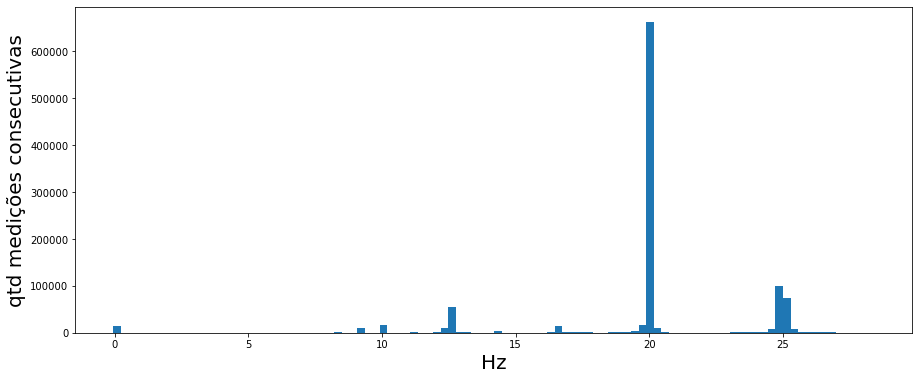

In [88]:
plt.figure(figsize=(15,6))
plt.hist(freq[freq < 0.5*1e15],bins = 100)
plt.xlabel("Hz", fontsize=20)
plt.ylabel("qtd medições consecutivas", fontsize=20)
plt.show()

In [89]:
df.to_csv("D:\Machine Learning\desafio-valorian\dataset\dataset.csv")